
<img align="left"  src= "http://aaun.edu.au/wp-content/uploads/2016/02/Department_of_Education_and_Training_Australia_logo.jpg" width="300">


<img align="right"  src= "https://www.courseseeker.edu.au/assets/images/institutions/4450.png" width="220">

## 1. Introduction

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the DETE exit survey data here here. The original TAFE exit survey data is no longer available. We've made some slight modifications to the original datasets to make them easier to work with, including changing the encoding to `UTF-8` (the original ones are encoded using `cp1252`.)

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

- `Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?`


- `Are younger employees resigning due to some kind of dissatisfaction?`


- `What about older employees?`

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.

A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

- `ID`: An id used to identify the participant of the survey


- `SeparationType`: The reason why the person's employment ended


- `Cease Date`: The year or month the person's employment ended


- `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

- `Record ID`: An id used to identify the participant of the survey


- `Reason for ceasing employment`: The reason why the person's employment ended


- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
dete_survey_first = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [3]:
def missing_on_columns(df):
    df_nulls = df.isnull().sum()
    len_df_nulls = len(df_nulls)

    zero_NaN=0
    cnt=0
    
    for pos_column in range(len_df_nulls):
        if df_nulls[pos_column] > zero_NaN:
            cnt+=1
            print(df_nulls.index[pos_column], "\n")
            print(df[df_nulls.index[pos_column]].value_counts(dropna = False), "\n")
    print(f"# columns with missing values: {cnt} of: {len_df_nulls} ","\n" )

___
### Overview over `dete_survey_first` dataframe.

<br/>

- Info about `dete_survey_first`:

        - RangeIndex: # of entries, 0 to end
        - Columns: # entries, firs solumn name to end column name
        - dtypes: types of data that make up the dataset
        - memory usage: 


- Look just the **first 3 rows** over the **"head" 🤖 of dataframe**:

    - Visualize just first lines to **avoid extra verbose mode**.
    

- Detecting **missing values** over columns:


- Calling the custom `missing_on_columns()` function:

    - show **missing values by column**.
    
    
- Info about `dete_survey_first`.

In [4]:
dete_survey_first.info(verbose=False,
                       memory_usage=True,
                       null_counts=True) # Department of Education, Training and Employment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Columns: 56 entries, ID to NESB
dtypes: bool(18), int64(1), object(37)
memory usage: 258.6+ KB


- Just a look.

In [5]:
dete_survey_first.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


 - **Missing values** over columns and **NaN** in `dete_survey_first`.

In [6]:
dete_survey_first.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

- Call to custom function `missing_on_columns(df)`.

In [7]:
missing_on_columns(dete_survey_first) #columns with almost 1 missing value or NaN.

Position 

Teacher                                                    324
Teacher Aide                                               137
Public Servant                                             126
Cleaner                                                     97
Head of Curriculum/Head of Special Education                38
Schools Officer                                             24
School Administrative Staff                                 16
Guidance Officer                                            12
Technical Officer                                           11
Other                                                        7
Professional Officer                                         7
School Principal                                             5
School Based Professional Staff (Therapist, nurse, etc)      5
NaN                                                          5
Deputy Principal                                             4
Business Service Manager                    

___

### Overview over  `tafe_survey` dataframe.

<br/>

- Info about `tafe_survey`:

        - RangeIndex: # of entries, 0 to end
        - Columns: # entries, firs solumn name to end column name
        - dtypes: types of data that make up the dataset
        - memory usage: 


- Look just the **first 3 rows** over the **"head" 🤖 of dataframe**:

    - Visualize just first lines to **avoid extra verbose mode**.
    

- Detecting **missing values** over columns:


- Calling the custom `missing_on_columns()` function:

    - show **missing values by column**.
    

- Info about `tafe_survey`.

In [8]:
tafe_survey.info(verbose=False,
                 memory_usage=True,
                 null_counts=True) #  Technical and Further Education (TAFE) institute in Queensland, Australia. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Columns: 72 entries, Record ID to LengthofServiceCurrent. Length of Service at current workplace (in years)
dtypes: float64(2), object(70)
memory usage: 395.0+ KB


- Just a look. 👀

In [9]:
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

 - **Missing values** over columns and **NaN** in `tafe_survey`.

In [10]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [11]:
missing_on_columns(tafe_survey)

CESSATION YEAR 

2011.0    268
2012.0    235
2010.0    103
2013.0     85
NaN         7
2009.0      4
Name: CESSATION YEAR, dtype: int64 

Reason for ceasing employment 

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: Reason for ceasing employment, dtype: int64 

Contributing Factors. Career Move - Public Sector  

-                              375
NaN                            265
Career Move - Public Sector     62
Name: Contributing Factors. Career Move - Public Sector , dtype: int64 

Contributing Factors. Career Move - Private Sector  

-                               336
NaN                             265
Career Move - Private Sector    101
Name: Contributing Factors. Career Move - Private Sector , dtype: int64 

Contributing Factors. Career Move - Self-employment 

-                                

### Observations:

`dete_survey` dataframe contains `'Not Stated'` values that indicate **values are missing, but they aren't represented as `NaN`**.

**Both** the `dete_survey` and `tafe_survey` dataframes contain **many columns that we don't need to complete our analysis**.

Each dataframe contains many of the **same columns, but the column names are different**.

**There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.**

___
## 2. Identify Missing Values and Drop Unnecessary Columns

<br/>

- To start, we'll handle values that should be represented as `NaN`. We'll use `pd.read_csv()` function to fix the missing values first. 


- Then, we'll drop columns we know we don't need for our analysis.

In [12]:
dete_survey = pd.read_csv('dete_survey.csv',na_values = 'Not Stated')

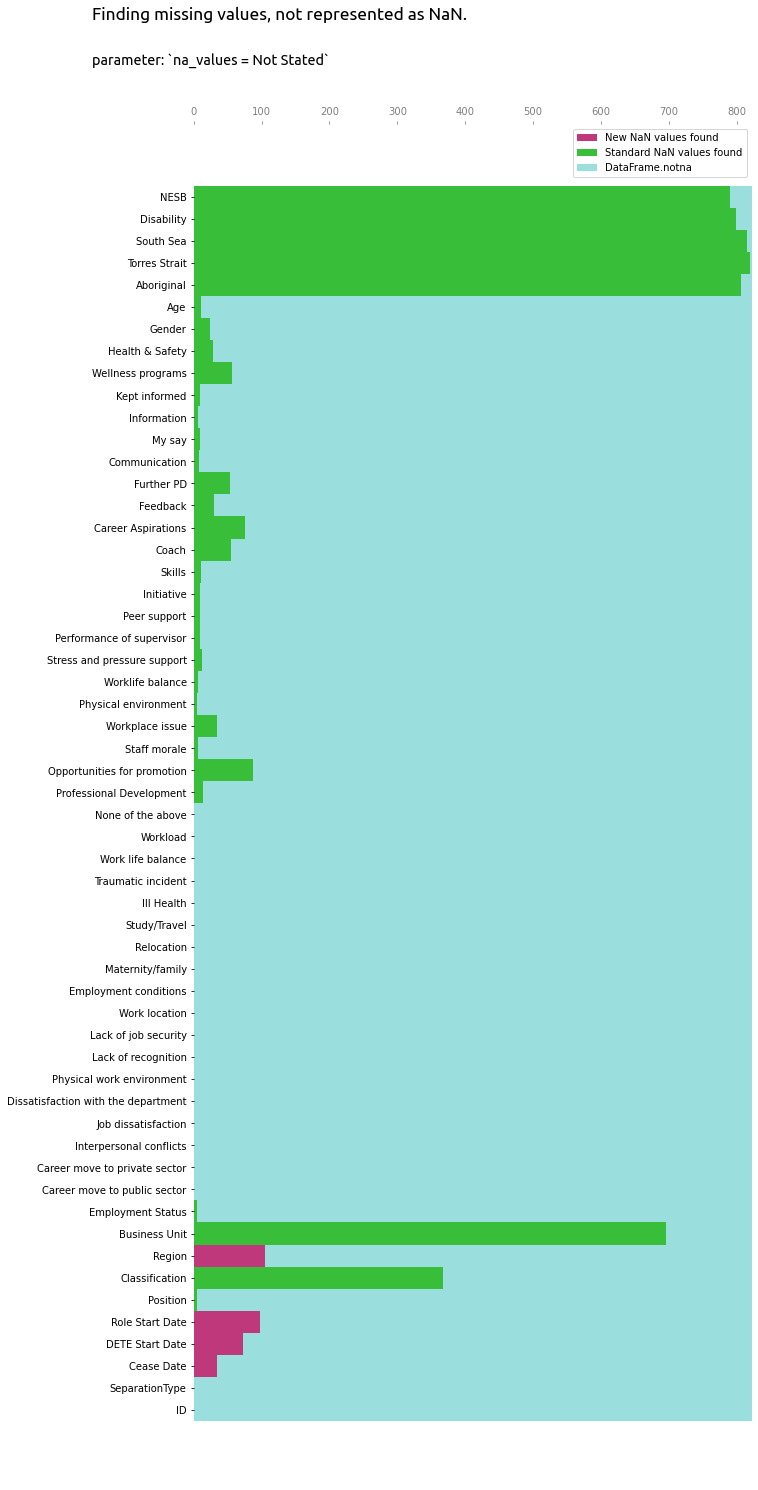

In [13]:
import matplotlib.pyplot as plt

# data from `dete_survey_first` first variable:
num_cols = dete_survey.isnull().sum().index                   # columns name of dete_survey 
bar_heights_first = dete_survey_first.isnull().sum()                # value of columns of dete_survey 

# data load from `dete_survey` and the -- na_values = 'Not Stated' --  parameter is set. 
bar_heights = dete_survey.isnull().sum()                      # value of columns of dete_survey 

# data load from `dete_survey` show all not NaN (background on graphic) 
num_cols_notna = dete_survey.notna().sum().index              # columns name of dete_survey
bar_heights_notna = dete_survey.notna().sum()                 # value of columns of dete_survey

fig, ax = plt.subplots(figsize=(10,25))

ax.text(x=-150, y=63, s="Finding missing values, not represented as NaN.", family='ubuntu', fontsize='xx-large')
ax.text(x=-150, y=61, s='parameter: `na_values = Not Stated`', family='ubuntu', fontsize='x-large')

# layers layout

ax.barh(num_cols, 
        bar_heights,
        height=1,
        color='#be387b', #fucsia color
        alpha=1,
        label='New NaN values found')

ax.barh(num_cols, 
        bar_heights_first,
        height=1,   
        color='#38be38',  #verde
        alpha=1,
        label='Standard NaN values found')


ax.barh(num_cols_notna, 
        -bar_heights_notna, left=822,
        height=1,  
        color='#38bebe',  #turquesa color
        alpha=0.5,
        label='DataFrame.notna')


for location in ['left', 'right', 'bottom', 'top']: # remove the axes
    ax.spines[location].set_visible(False)
    
ax.xaxis.tick_top()                                 # move tick labels top of the graph
ax.tick_params(axis='x', colors='grey')

plt.legend()
plt.show()

___
### Columns to drop on `dete_survey` from #28 to #48.

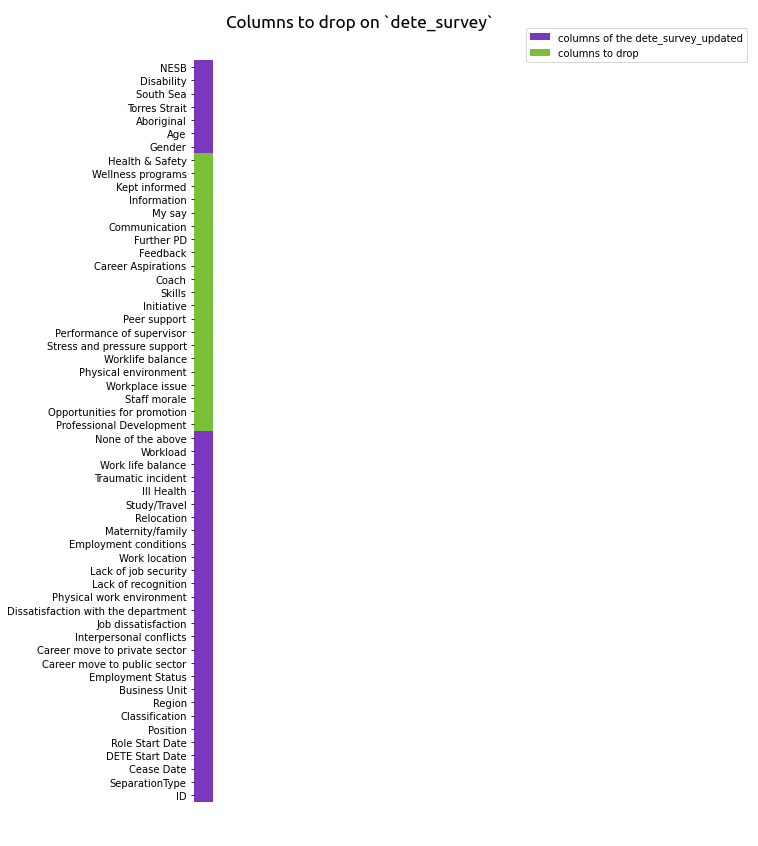

In [14]:

num_cols = dete_survey.isnull().sum().index  # Columns name of dete_survey.
columns_to_drop = dete_survey.columns[28:49] # Columns to drop in dete_survey.

fig, ax = plt.subplots(figsize=(10,15))


ax.text(x=50, y=58, s='Columns to drop on `dete_survey`', family='ubuntu', fontsize='xx-large')
ax.text(x=-150, y=61, s='', family='ubuntu', fontsize='large')

# layer of all columns.
withd=30
ax.barh(num_cols, # selecting all columns
        withd,
        height=1,
        color='#7b38be', #violeta
        alpha=1,
        label='columns of the dete_survey_updated')

# layer of columns to remove.
ax.barh(columns_to_drop, # slicing columns to drop
        withd,
        height=1,
        color='#7bbe38', #pistacho
        alpha=1,
        label='columns to drop')

# layer white mask.
white_withd = 800
ax.barh(num_cols, white_withd, left=30,
        height=1,
        color='#ffffff', #ffffff white color
        alpha=1)

for location in ['left', 'right', 'bottom', 'top']: # remove the axes
    ax.spines[location].set_visible(False)
    
ax.xaxis.tick_top()                                 # move tick labels top of the graph
ax.tick_params(axis='x', colors='white')

plt.legend()
plt.show()

In [15]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis =1) #dropping dete_survey columns

___
### Columns to drop on `tafe_survey` from #17 to #65.

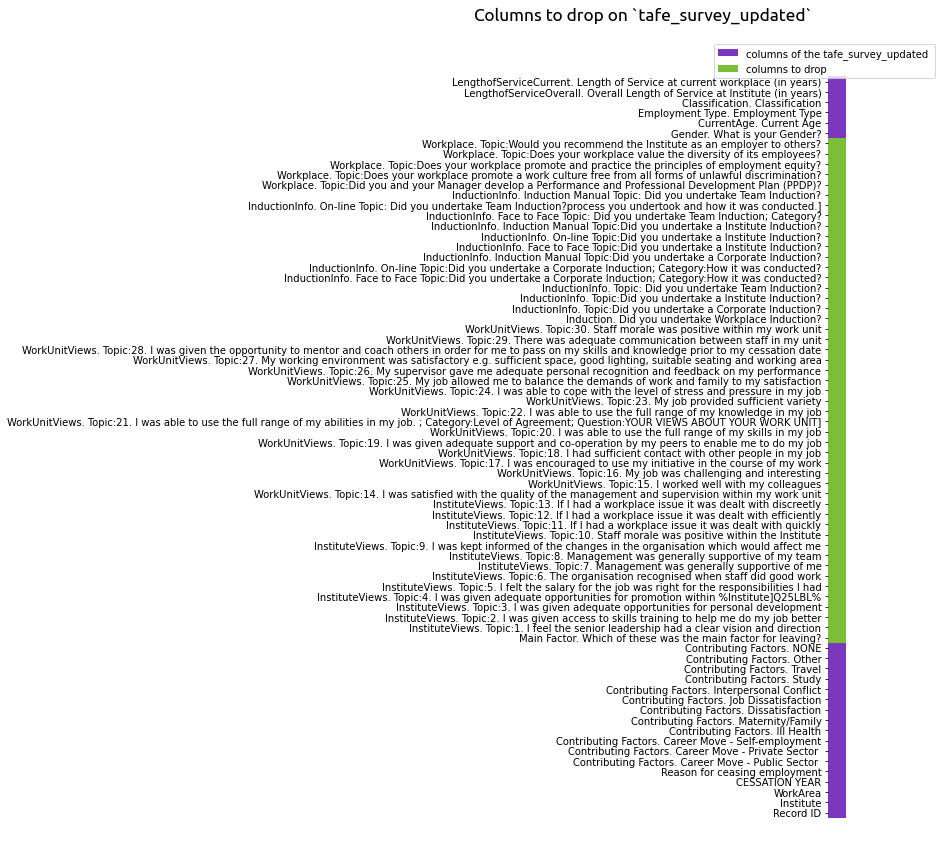

In [16]:
num_cols_tafe = tafe_survey.isnull().sum().index # Columns name of tafe_survey.
bar_heights = tafe_survey.isnull().sum() 

num_cols_del = tafe_survey.columns[17:66] # Columns to drop in tafe_survey.

fig, ax = plt.subplots(figsize=(2,15))

ax.text(x=-2000, y=77, s='Columns to drop on `tafe_survey_updated`', family='ubuntu', fontsize='xx-large')

# layer of all columns.
height_constant = 100

ax.barh( num_cols_tafe,
        height_constant,
        height=1,
        color='#7b38be', #fucsia  
        alpha=1,
        label='columns of the tafe_survey_updated ')

# layer of columns to remove.
ax.barh( num_cols_del, # slicing columns to drop
        height_constant,
        height=1,
        color='#7bbe38', #pistacho
        alpha=1,
        label='columns to drop ')

# layer white mask.
white_withd = 500
ax.barh( num_cols_tafe, white_withd, left=100,
        height=1,
        color='#ffffff', #ffffff
        alpha=1)

for location in ['left', 'right', 'bottom', 'top']: # remove the axes
    ax.spines[location].set_visible(False)
    
ax.xaxis.tick_top()                                 # move tick labels top of the graph
ax.tick_params(axis='x', colors='white')


plt.legend(loc='best')
plt.show()

In [17]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis =1) #dropping tafe_survey columns

---
## 3. Cleaning column names in both dataframes.

#### Beacuse we eventually want to combine both `df's`, we'll have to standardize the column names:

- Renaming the remaining columns in the `dete_survey_updated` dataframe, using the following criteria to update the column names:
___

### `dete_survey_updated`

Through the use of **vectorized methods** we will:

- All the capitalization must be lowercase: **`.str.lower()`**

- Any trailing whitespace from the end of the strings must be removed: **`.str.rstrip()`**

- Replacing spaces with underscores (' _ '): **`.str.replace(' ' , '_')`**

In [18]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.rstrip().str.replace(' ','_')
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   822 non-null    int64  
 1   separationtype                       822 non-null    object 
 2   cease_date                           788 non-null    object 
 3   dete_start_date                      749 non-null    float64
 4   role_start_date                      724 non-null    float64
 5   position                             817 non-null    object 
 6   classification                       455 non-null    object 
 7   region                               717 non-null    object 
 8   business_unit                        126 non-null    object 
 9   employment_status                    817 non-null    object 
 10  career_move_to_public_sector         822 non-null    bool   
 11  career_move_to_private_sector   

Update the columns in `tafe_survey_updated` with `.rename` method.
___
### `tafe_survey_updated`

Here **we will use a dictionary** and the method `.rename` to rename the columns:

In [19]:
tafe_survey_updated.rename({'Record ID': 'id',
                            'CESSATION YEAR': 'cease_date',
                            'Reason for ceasing employment': 'separationtype',
                            'Gender. What is your Gender?': 'gender',
                            'CurrentAge. Current Age': 'age',
                            'Employment Type. Employment Type': 'employment_status',
                            'Classification. Classification': 'position',
                            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'},
                          axis=1, inplace=True)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   702 non-null    float64
 1   Institute                                            702 non-null    object 
 2   WorkArea                                             702 non-null    object 
 3   cease_date                                           695 non-null    float64
 4   separationtype                                       701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   437 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  437 non-null    object 
 8   Contributing Factors. Ill Health                     437 non-null    o

In [20]:
# explica por que has hecho los cambios. Because we eventually want to combine them, we'll have to standardize the column names

___
## 4. Filtering the Data

For this project, **we'll only analyze survey respondents who resigned**, so their separation type contains the string `'Resignation'`.

Review the **unique values** in the **separationtype** column in both `dete_survey_updated` and `tafe_survey_updated`.

If we look at the **unique values** in the `separationtype` columns in **each dataframe**, we'll see that each contains a couple of different separation types. 
___

### `dete_survey_updated`

In [21]:
dete_survey_updated['separationtype'].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

In [22]:
dete_survey_updated['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

___
### `tafe_survey_updated`

In [23]:
tafe_survey_updated['separationtype'].unique()

array(['Contract Expired', 'Retirement', 'Resignation',
       'Retrenchment/ Redundancy', 'Termination', 'Transfer', nan],
      dtype=object)

In [24]:
tafe_survey_updated['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

### Filtering the "resignation separation" type In both dataframes.

Select **only** the data for survey respondents who have a **Resignation separation** type.

In [25]:
dete_resignations=dete_survey_updated[(dete_survey_updated['separationtype']=='Resignation-Other reasons') |
                                      (dete_survey_updated['separationtype']=='Resignation-Other employer') |
                                      (dete_survey_updated['separationtype']=='Resignation-Move overseas/interstate')].copy()

dete_resignations['separationtype'].value_counts(dropna=False)

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [26]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()
tafe_resignations['separationtype'].value_counts(dropna=False)

Resignation    340
Name: separationtype, dtype: int64

### Write a markdown paragraph explaining the changes you made and why.
___

## 5. Verify the Data 

let's verify that the data doesn't contain any major **inconsistencies**.

In this step, we'll focus on verifying that the **years** in the `cease_date `and `dete_start_date` columns make sense. 

However, we encourage you to check the data for other issues as well!

- Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.


- Given that most people in this field start working in their 20s, it's also **unlikely that the `dete_start_date` was before the year 1940**.


- If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. 

- If there are a small amount of values that are unrealistically high or low, we can remove them.




---
### `dete_resignations` verification data:

Let's check what type of data we have in `dete_resignations['dete_start_date']`

In [27]:
dete_resignations['dete_start_date'].dtype 

dtype('float64')

if we have `NaN`

In [28]:
dete_resignations['dete_start_date'].isna().sum()

28

and the same in `dete_resignations['cease_date']`

In [29]:
dete_resignations['cease_date'].unique()

array(['05/2012', '07/2012', '2012', '2013', '2010', '07/2013', '06/2013',
       '09/2013', '09/2010', '01/2014', '05/2013', '08/2013', '10/2013',
       '12/2013', '11/2013', nan, '07/2006'], dtype=object)

this last step has shown us that the data contained in the series is of object type that have a format in which we must extract the years and that there is also `NaN`.

Let's see how many `NaN` we have in `dete_resignations['cease_date']`

In [30]:
dete_resignations['cease_date'].isna().sum()

11

<AxesSubplot:ylabel='position'>

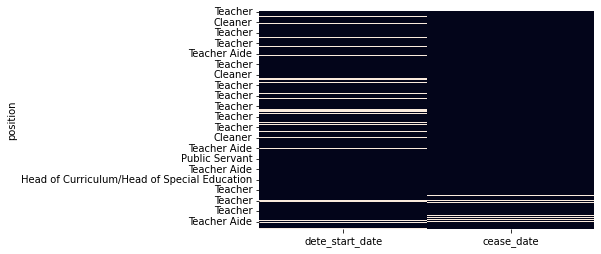

In [31]:
import seaborn as sns
combined_cease_date = dete_resignations.set_index('position')
sns.heatmap(combined_cease_date[['dete_start_date','cease_date']].isnull(), cbar=False)

**important:**

- We extract the part of the chain that corresponds to the **year** in `dete_resignations['cease_date']`
- We convert the year string into a **float** data type

In [32]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:].astype('float').copy() # getting Years

In [33]:
dete_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
NaN        11
Name: cease_date, dtype: int64

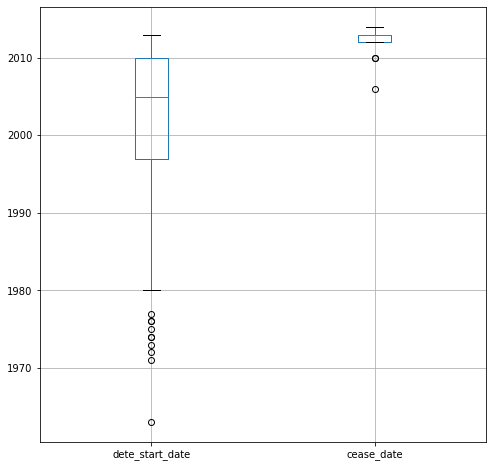

In [34]:
#dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index(ascending=False)
boxplot = dete_resignations.boxplot(column=['dete_start_date','cease_date'], figsize=(8,8)) 

In [35]:
dete_resignations['dete_start_date'].isnull().value_counts() # 28 means NaN values. 

False    283
True      28
Name: dete_start_date, dtype: int64

___
### `tafe_resignations` verification data:

In [36]:
dete_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
NaN        11
Name: cease_date, dtype: int64

<AxesSubplot:ylabel='position'>

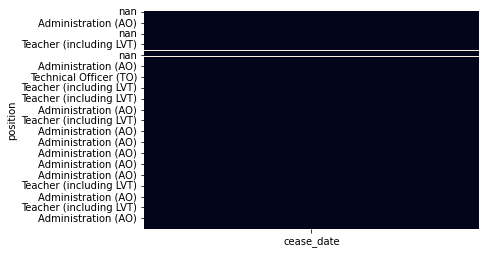

In [37]:
combined_tafe_date = tafe_resignations.set_index('position')
sns.heatmap(combined_tafe_date[['cease_date']].isnull(), cbar=False)

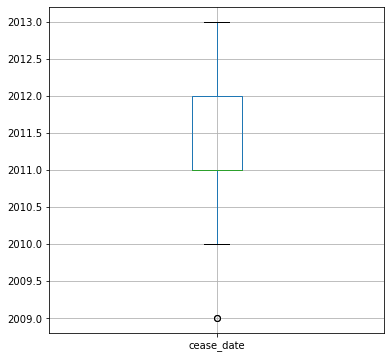

In [38]:
boxplot = tafe_resignations.boxplot(column=['cease_date'], figsize=(6,6))

In [39]:
tafe_resignations['cease_date'].isnull().value_counts()

False    335
True       5
Name: cease_date, dtype: int64

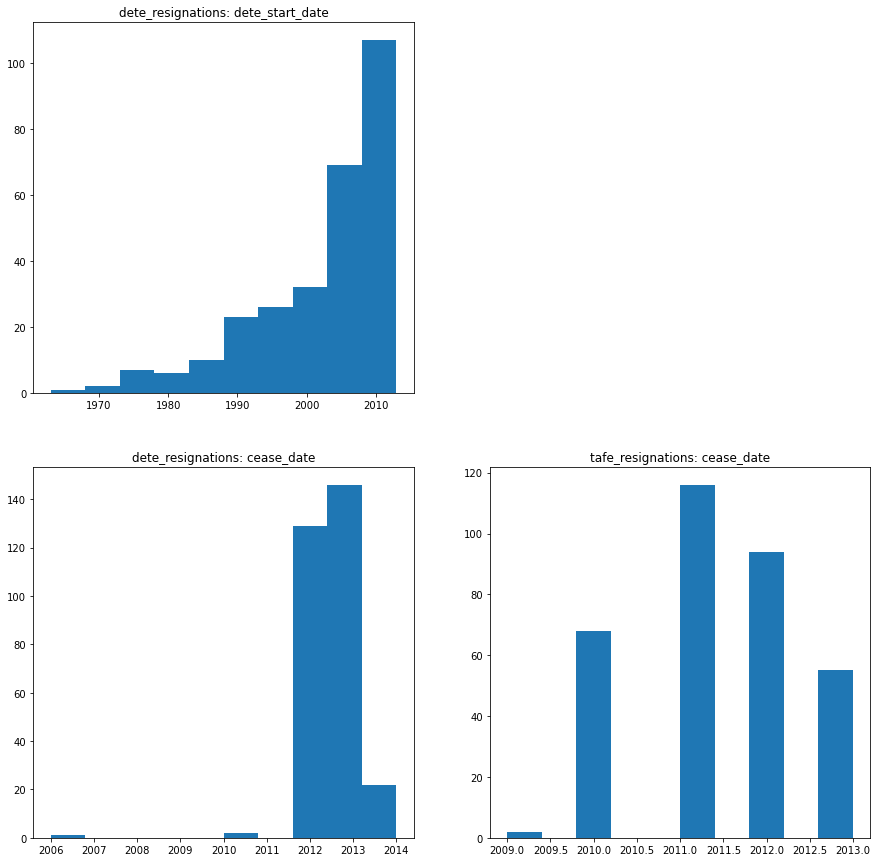

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(2,2,1) #dete_resignations: dete_start_date
ax2 = fig.add_subplot(2,2,3) #dete_resignations: cease_date
ax3 = fig.add_subplot(2,2,4) #tafe_resignations: cease_date

ax1.set_title('dete_resignations: dete_start_date')
ax1.hist(dete_resignations['dete_start_date'])

ax2.set_title('dete_resignations: cease_date')
ax2.hist(dete_resignations['cease_date'])

ax3.set_title('tafe_resignations: cease_date')
ax3.hist(tafe_resignations['cease_date'])


plt.show()

## 6. Create a New Column

Now that we've verified the years in the `dete_resignations` dataframe, we'll use them to create a new column.

You may have noticed that the `tafe_resignations` df **already contains** a **"service"** column, which we renamed to **institute_service**. In order to analyze both surveys together.

we'll have to create a corresponding **institute_service** column in `dete_resignations`.

In [41]:
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']

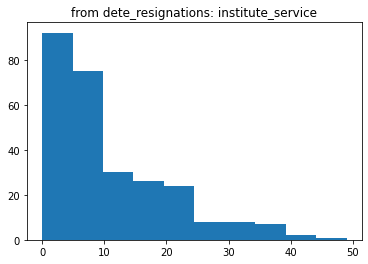

In [42]:
fig, ax = plt.subplots()
ax.set_title('from dete_resignations: institute_service')
ax.hist(dete_resignations['institute_service'])
plt.show()

This 👆 is the distribution resulting from making the subtraction between previous, as it is logical, the lowest values are the ones that abound the most.

____
## 7. Identify Dissatisfied Employees

- We'll use to categorize employees as "dissatisfied" from each dataframe.

`tafe_survey_updated`:
- Contributing Factors. Dissatisfaction

- Contributing Factors. Job Dissatisfaction

`dete_survey_updated`:
- job_dissatisfaction

- dissatisfaction_with_the_department

- physical_work_environment

- lack_of_recognition

- lack_of_job_security

- work_location

- employment_conditions

- work_life_balance

- workload

If the employee indicated **any** of the factors above caused them to resign, we'll mark them as **dissatisfied** in a new column.

In [43]:
tafe_resignations['Contributing Factors. Dissatisfaction'].unique()

array(['-', 'Contributing Factors. Dissatisfaction ', nan], dtype=object)

In [44]:
tafe_survey_updated['Contributing Factors. Job Dissatisfaction'].unique()

array([nan, '-', 'Job Dissatisfaction'], dtype=object)

___
### Function `update_vals`

This function allows to maintain the `NaN` values and convert into **True all the values that are not `-`**

In [45]:
def update_vals(element):
    if pd.isnull(element):        
        return np.nan
    elif element=='-':
        return False
    else:
        return True

___

### Setting the bolean values on multiple columns with `update_vals` in `tafe_resignations_up`.

In [46]:
columns = ['Contributing Factors. Dissatisfaction',
           'Contributing Factors. Job Dissatisfaction']

tafe_resignations['dissatisfied'] = tafe_resignations[columns].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [47]:
tafe_resignations_up[['dissatisfied']].head()

,dissatisfied
3,False
4,False
5,False
6,False
7,False


### Setting bolean values through `dete_resignations_up` any(axis=1, skipna=False)

In [48]:
columnas = ['job_dissatisfaction',
            'dissatisfaction_with_the_department',
            'physical_work_environment',
            'lack_of_recognition',
            'lack_of_job_security',
            'work_location',
            'employment_conditions',
            'work_life_balance',
            'workload']

dete_resignations[columnas].dtypes

job_dissatisfaction                    bool
dissatisfaction_with_the_department    bool
physical_work_environment              bool
lack_of_recognition                    bool
lack_of_job_security                   bool
work_location                          bool
employment_conditions                  bool
work_life_balance                      bool
workload                               bool
dtype: object

In [49]:
dete_resignations[columnas].head(4)

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False


In [50]:
dete_resignations['dissatisfied'] = dete_resignations[columnas].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()

dete_resignations_up['dissatisfied'].value_counts(dropna=False) # only boolean

False    162
True     149
Name: dissatisfied, dtype: int64

___
## 8. Combining `dete_resignations_up` and `tafe_resignations_up`

First, let's add a column to each dataframe that will allow us to easily distinguish between the two.

- Add a column named institute to `dete_resignations_up`. Each row should contain the value **DETE**.

- Add a column named institute to `tafe_resignations_up`. Each row should contain the value **TAFE**.

In [51]:
dete_resignations_up['institute']='DETE' # help for differenciate df's.
tafe_resignations_up['institute']='TAFE'

Combine the dataframes. Assign the result to `combined`.

In [52]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up], axis = 0) # axis = 0 means columns. 

Recall that we still have some columns left in the dataframe that we don't need to complete our analysis. 

Use the `DataFrame.dropna()` method to drop **any columns with less than 500** non null values.

Remember that you can drop columns with less than a certain number of non null values with the thresh parameter.

Assign the result to `combined_updated`.

In [53]:
combined_updated = combined.dropna(axis = 1, thresh = 500).copy() # combined_updated

### 📸 reset-index-in-a-pandas-dataframe 📸

In order not to have the repeated indices and that the graphs can work for me, I had to do this:
[How to reset index in a pandas dataframe? [duplicate]](https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe)

In [54]:
combined_updated.reset_index(drop=True, inplace=True) 

___
## 9. Clean the Service Column 

**...means playing with data type**


Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the `institute_service` column. 

This column is tricky to clean because it currently contains values in a couple different forms:



In [55]:
combined_updated['institute_service'].dtypes

dtype('O')

We see that the series is of type `dtype('O')` 

However pandas seem to lack that distinction and coerce `str` to `object`[explanation](https://stackoverflow.com/questions/34881079/pandas-distinction-between-str-and-object-types) because of this in the next cell we force it to be of the `str` type, but do this the regular expressions would not work correctly since they have to have strings of type `str`

In [56]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str) # <-astype(str) imprescindible
combined_updated['institute_service'].unique()

array(['7.0', '18.0', '3.0', '15.0', '14.0', '5.0', 'nan', '30.0', '32.0',
       '39.0', '17.0', '9.0', '6.0', '1.0', '35.0', '38.0', '36.0',
       '19.0', '4.0', '26.0', '10.0', '8.0', '2.0', '0.0', '23.0', '13.0',
       '16.0', '12.0', '21.0', '20.0', '24.0', '33.0', '22.0', '28.0',
       '49.0', '11.0', '41.0', '27.0', '42.0', '25.0', '29.0', '34.0',
       '31.0', '3-4', '7-10', '1-2', 'Less than 1 year', '11-20', '5-6',
       'More than 20 years'], dtype=object)

To analyze the data, we'll convert these numbers into categories. Through the use of vectorized methods and **regex** expressions.

In [57]:

## ReGex pattern for filtering ##

# pat = r"(?P<punto0>[.][0])|
# (?P<uno_a_dos>[1][-][2])|
# (?P<tres_a_cuatro>[3][-][4])|
# (?P<siete_diez>[7][-][1][0])|
# (?P<once_veinte>[1]{2}-[2][0])|
# (?P<cinco_seis>[5][-][6])|
# (?P<Less>Less than 1 year)|
# (?P<More>More than 20 years)"

# es necesario que sea str sino no se puede hacer uso de accesores correctamente

combined_updated['institute_service'] = combined_updated['institute_service'].str.replace("[.^0][1-2^0]","").str.replace("1-2","1.5").str.replace("3-4","3.5").str.replace("5-6","4.5").str.replace("7-10","8.5").str.replace("11-20","15.5").str.replace("Less than 1 year","0.5").str.replace("More than 20 years","25")

- once we have cleaned, we convert the series from `str` to `float` type.

In [58]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)
combined_updated['institute_service'][2:18] # just an example

2      3.0
3     15.0
4      3.0
5     14.0
6      5.0
7      NaN
8     30.0
9     32.0
10    15.0
11    39.0
12    17.0
13     7.0
14     9.0
15     6.0
16     1.0
17     NaN
Name: institute_service, dtype: float64

In [59]:
def mapper(val):
    if pd.isnull(val):
        return np.nan
    elif (val < 3): # Less than 3 years at a company
        return 'New'
    
    elif ((val >= 3) & (val <= 6.0)): # 3-6 years at a company
        return 'Experienced'
    
    elif ((val >= 7.0) & (val <= 10.0)): # 7-10 years at a company
        return 'Established'
    
    elif (val >= 11.0): #  11 or more years at a company
        return 'Veteran'

In [60]:
combined_updated['service_cat']=combined_updated['institute_service'].apply(mapper)

In [61]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [62]:
combined_updated.head(2) # The final dataframe!

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,Established
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran


___
## 10. Perform Initial Analysis 📊

In [63]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    float64
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
 10  service_cat        563 non-null    object 
dtypes: float64(3), object(8)
memory usage: 56.1+ KB


- `Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?`


- `What about employees who have been there longer?`


- `Are younger employees resigning due to some kind of dissatisfaction?`


- `What about older employees?`


Our work here is far from done! We recommend that you continue with the following steps:

Decide how to handle the rest of the missing values. 

Then, aggregate the data according to the `service_cat` column again. How many people in each career stage resigned due to some kind of dissatisfaction?

Clean the `age` column. 

`How many people in each age group resgined due to some kind of dissatisfaction?`


Instead of analyzing the survey results together, analyze each survey separately. 

`Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?`

Format your project using Dataquest's project style guide.

### - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?

In [64]:
dissatisfied_grouped = combined_updated.groupby('dissatisfied')
employees_dissatisfied = dissatisfied_grouped.get_group(1) # 1 True / 0 False
short_period = employees_dissatisfied.groupby('service_cat')
new_dissatidfied =  short_period.get_group('New')
new_dissatidfied[1:5]

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
43,119.0,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Female,46-50,2.0,True,DETE,New
44,125.0,Resignation-Other employer,2012.0,Public Servant,Permanent Part-time,Female,36-40,0.0,True,DETE,New
46,131.0,Resignation-Other employer,2012.0,Public Servant,Temporary Full-time,Male,51-55,0.0,True,DETE,New
56,180.0,Resignation-Other reasons,2012.0,Cleaner,Permanent Full-time,Female,36-40,0.0,True,DETE,New


In [65]:
new_dissatidfied['separationtype'].value_counts()

Resignation                             36
Resignation-Other reasons                9
Resignation-Move overseas/interstate     7
Resignation-Other employer               5
Name: separationtype, dtype: int64

### - What about employees who have been there longer?

In [66]:
long_period = employees_dissatisfied.groupby('service_cat')
veteran_dissatidfied =  long_period.get_group('Veteran')
veteran_dissatidfied[1:5]

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
10,23.0,Resignation-Other reasons,2012.0,School Administrative Staff,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
11,24.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,61 or older,39.0,True,DETE,Veteran
12,26.0,Resignation-Other reasons,2012.0,Teacher,Permanent Part-time,Female,41-45,17.0,True,DETE,Veteran


In [67]:
veteran_dissatidfied['separationtype'].value_counts()

Resignation-Other reasons               40
Resignation-Other employer              13
Resignation                             10
Resignation-Move overseas/interstate     3
Name: separationtype, dtype: int64

 ### 
|Are employees who only worked for the institutes resigning due to some kind of dissatisfaction?|||
|:---|---:|:--|
|                                   |Newby|Veteran||
|Resignation|                         36|10||
|Resignation-Other reasons|           9 |40|
|Resignation-Move overseas/interstate| 7 |3|
|Resignation-Other employer|           5 |13|

 ### - How many people in each career stage resigned due to some kind of dissatisfaction?

___
### `Veteran`

In [68]:
veteran_dissatidfied = employees_dissatisfied.groupby('service_cat')
veteran_position =  veteran_dissatidfied.get_group('Veteran') 

In [69]:
veteran_position['position'].value_counts()

Teacher                                         28
Teacher Aide                                    11
Teacher (including LVT)                          8
Head of Curriculum/Head of Special Education     4
Cleaner                                          4
Guidance Officer                                 3
Public Servant                                   2
Technical Officer                                1
Other                                            1
Operational (OO)                                 1
School Administrative Staff                      1
Administration (AO)                              1
Name: position, dtype: int64

In [70]:
veteran_position['separationtype'].value_counts()

Resignation-Other reasons               40
Resignation-Other employer              13
Resignation                             10
Resignation-Move overseas/interstate     3
Name: separationtype, dtype: int64

___
### `Established`

In [71]:
established_dissatidfied = employees_dissatisfied.groupby('service_cat')
established_position =  established_dissatidfied.get_group('Established') 

In [72]:
established_position['position'].value_counts()

Teacher                                         10
Public Servant                                   4
Teacher Aide                                     4
Cleaner                                          4
Teacher (including LVT)                          3
Administration (AO)                              3
Head of Curriculum/Head of Special Education     1
Professional Officer (PO)                        1
Schools Officer                                  1
Name: position, dtype: int64

In [73]:
established_position['separationtype'].value_counts()

Resignation-Other reasons               17
Resignation                              7
Resignation-Other employer               6
Resignation-Move overseas/interstate     2
Name: separationtype, dtype: int64

___
### `Experienced`

In [74]:
experienced_dissatidfied = employees_dissatisfied.groupby('service_cat')
experienced_position =  experienced_dissatidfied.get_group('Experienced') 

In [75]:
experienced_position['position'].value_counts()

Teacher                      16
Administration (AO)          14
Teacher (including LVT)       7
Public Servant                6
Teacher Aide                  5
Cleaner                       5
Schools Officer               2
Professional Officer (PO)     1
Operational (OO)              1
Executive (SES/SO)            1
Technical Officer             1
Name: position, dtype: int64

In [76]:
experienced_position['separationtype'].value_counts()

Resignation                             24
Resignation-Other reasons               17
Resignation-Other employer              13
Resignation-Move overseas/interstate     5
Name: separationtype, dtype: int64

___
### `New`

In [77]:
new_dissatidfied = employees_dissatisfied.groupby('service_cat')
new_position =  new_dissatidfied.get_group('New') 

In [78]:
new_position['position'].value_counts()

Teacher (including LVT)                                    18
Administration (AO)                                        14
Teacher                                                     8
Public Servant                                              4
Cleaner                                                     4
Technical Officer (TO)                                      2
School Administrative Staff                                 2
Operational (OO)                                            1
Other                                                       1
School Based Professional Staff (Therapist, nurse, etc)     1
Executive (SES/SO)                                          1
Teacher Aide                                                1
Name: position, dtype: int64

In [79]:
new_position['separationtype'].value_counts()

Resignation                             36
Resignation-Other reasons                9
Resignation-Move overseas/interstate     7
Resignation-Other employer               5
Name: separationtype, dtype: int64

___
### Clean the `age` column. 

I considered it appropriate to do two functions. one of them to be able to group `age_groups` by age and another `age_cleaner` to be able to work with the values of the ages.

In [80]:
combined_updated['age'].unique()

array(['36-40', '41-45', '31-35', '46-50', '61 or older', '56-60',
       '51-55', '21-25', '26-30', nan, '20 or younger', '41  45',
       '56 or older', '46  50', '36  40', '21  25', '31  35', '26  30'],
      dtype=object)

In [81]:
def age_groups(val):
    if pd.isnull(val):
        return np.nan
    elif val == '36-40':
        return '36-40'
    elif val == '41-45':
        return '41-45'
    elif val == '31-35':
        return '31-35'
    elif val == '46-50':
        return '46-50'
    elif val == '61 or older':
        return '61 or older'
    elif val == '56-60':
        return '56-60'
    elif val == '51-55':
        return '51-55'
    elif val == '21-25':
        return '21-25'
    elif val == '26-30':
        return '26-30'
    elif val == '20 or younger':
        return '20 or younger'
    elif val == '41  45':
        return '41-45'
    elif val == '56 or older':
        return '56-60'
    elif val == '46  50':
        return '46-50'
    elif val == '36 40':
        return '36-40'
    elif val == '21  25':
        return '21-25'
    elif val == '31  35':
        return '31-35'
    elif val == '26  30':
        return '26-30'

In [82]:
combined_updated['age']=combined_updated['age'].map(age_groups).copy()

In [83]:
def age_cleaner(val):
    if pd.isnull(val):
        return np.nan
    elif val == '36-40':
        return '38'
    elif val == '41-45':
        return '43'
    elif val == '31-35':
        return '33'
    elif val == '46-50':
        return '48'
    elif val == '61 or older':
        return '61'
    elif val == '56-60':
        return '58'
    elif val == '51-55':
        return '53'
    elif val == '21-25':
        return '23'
    elif val == '26-30':
        return '28'
    elif val == '20 or younger':
        return '19'
    elif val == '41  45':
        return '43'
    elif val == '56 or older':
        return '57'
    elif val == '46  50':
        return '48'
    elif val == '36 40':
        return '38'
    elif val == '21  25':
        return '23'
    elif val == '31  35':
        return '33'
    elif val == '26  30':
        return '28'

In [84]:
combined_updated['new_age'] = combined_updated['age'].map(age_cleaner).astype('float')
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat,new_age
0,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,Established,38.0
1,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran,43.0
2,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,Experienced,33.0
3,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran,48.0
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,Experienced,33.0
5,1.300000e+01,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,14.0,False,DETE,Veteran,38.0
6,1.500000e+01,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Male,31-35,5.0,True,DETE,Experienced,33.0
7,1.700000e+01,Resignation-Other reasons,2012.0,Teacher Aide,Permanent Part-time,Male,61 or older,NaN,True,DETE,NaN,61.0
8,2.100000e+01,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Male,56-60,30.0,False,DETE,Veteran,58.0
9,2.200000e+01,Resignation-Other reasons,2012.0,Cleaner,Permanent Part-time,Female,51-55,32.0,False,DETE,Veteran,53.0


### How many people in each age group resgined due to some kind of dissatisfaction?

In [85]:
combined_updated['age'].unique() # these are the age groups.

array(['36-40', '41-45', '31-35', '46-50', '61 or older', '56-60',
       '51-55', '21-25', '26-30', nan, '20 or younger', None],
      dtype=object)


Below I show the pairwise plot relationships of **all age groups** and added the `genre`, I found it interesting to plot this information.


### `'61 or older'`

In [86]:
age_dissatidfied = employees_dissatisfied.groupby('age')
older_position =  age_dissatidfied.get_group('61 or older') 

In [87]:
older_position['separationtype'].value_counts()

Resignation-Other reasons     11
Resignation-Other employer     1
Name: separationtype, dtype: int64

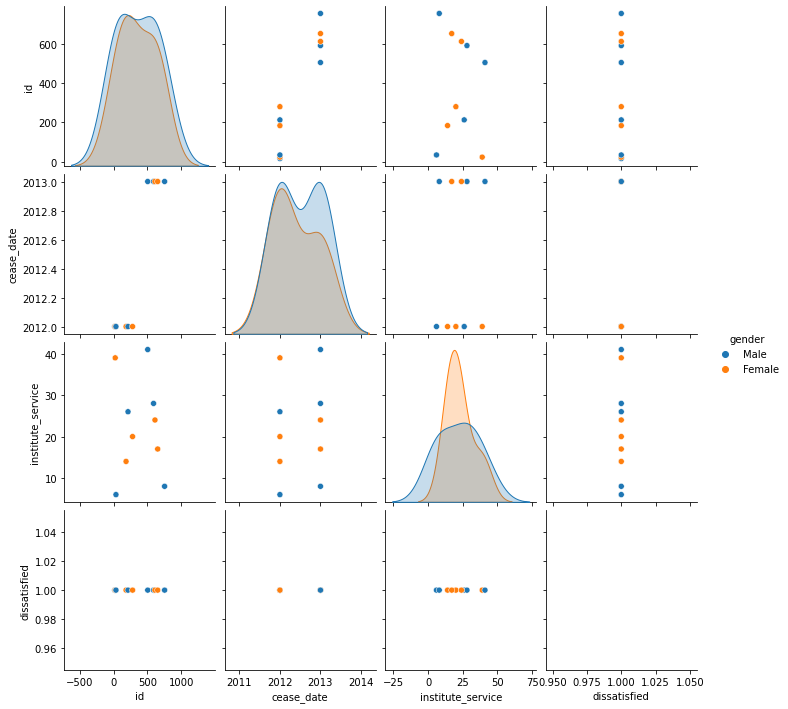

In [88]:
sns.pairplot(data=older_position, hue="gender")
plt.show()

### `'56-60'`

In [89]:
age_dissatidfied = employees_dissatisfied.groupby('age')
mid_fiftyes_position =  age_dissatidfied.get_group('56-60') 

In [90]:
mid_fiftyes_position['separationtype'].value_counts()

Resignation-Other reasons               11
Resignation-Other employer               3
Resignation-Move overseas/interstate     1
Name: separationtype, dtype: int64

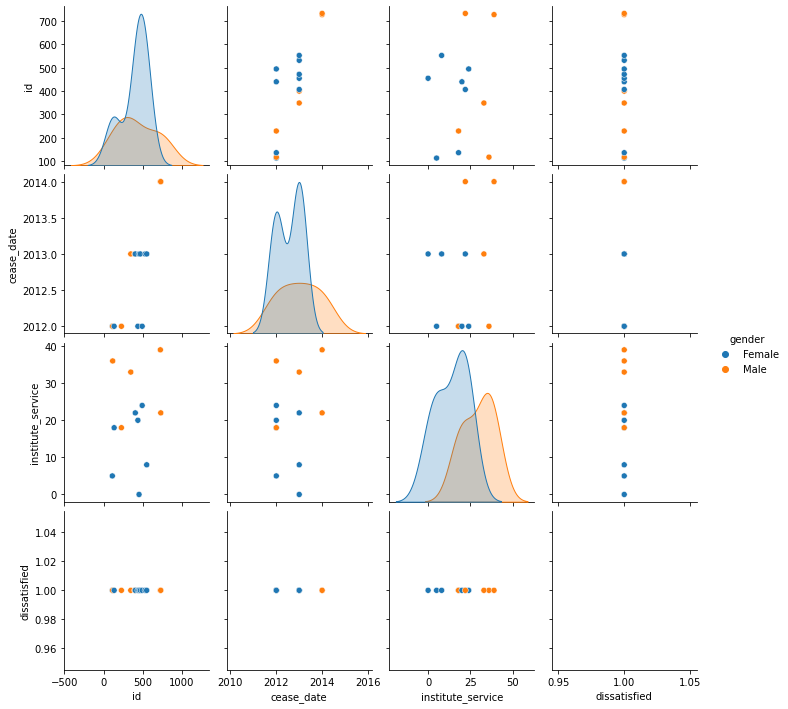

In [91]:
sns.pairplot(data=mid_fiftyes_position, hue="gender")

### `'51-55'`

In [92]:
age_dissatidfied = employees_dissatisfied.groupby('age')
earlyes_fiftyes_position =  age_dissatidfied.get_group('51-55') 

In [93]:
earlyes_fiftyes_position['separationtype'].value_counts()

Resignation-Other reasons               13
Resignation                             11
Resignation-Move overseas/interstate     3
Resignation-Other employer               3
Name: separationtype, dtype: int64

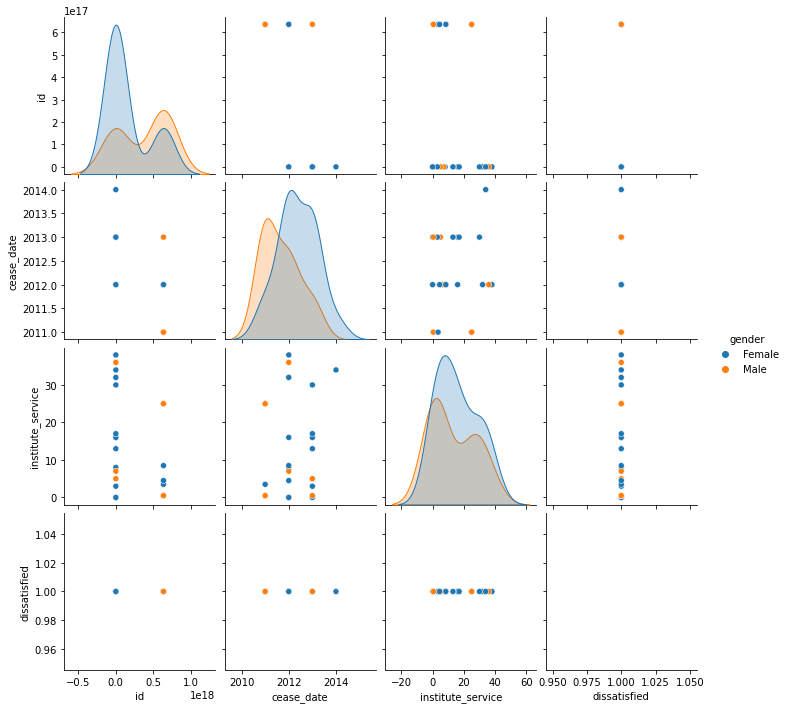

In [94]:
sns.pairplot(data=earlyes_fiftyes_position, hue="gender")

### `'46-50'`

In [95]:
age_dissatidfied = employees_dissatisfied.groupby('age')
mid_fortyes_position =  age_dissatidfied.get_group('46-50') 

In [96]:
mid_fortyes_position['separationtype'].value_counts()

Resignation-Other reasons               10
Resignation-Other employer               8
Resignation-Move overseas/interstate     1
Name: separationtype, dtype: int64

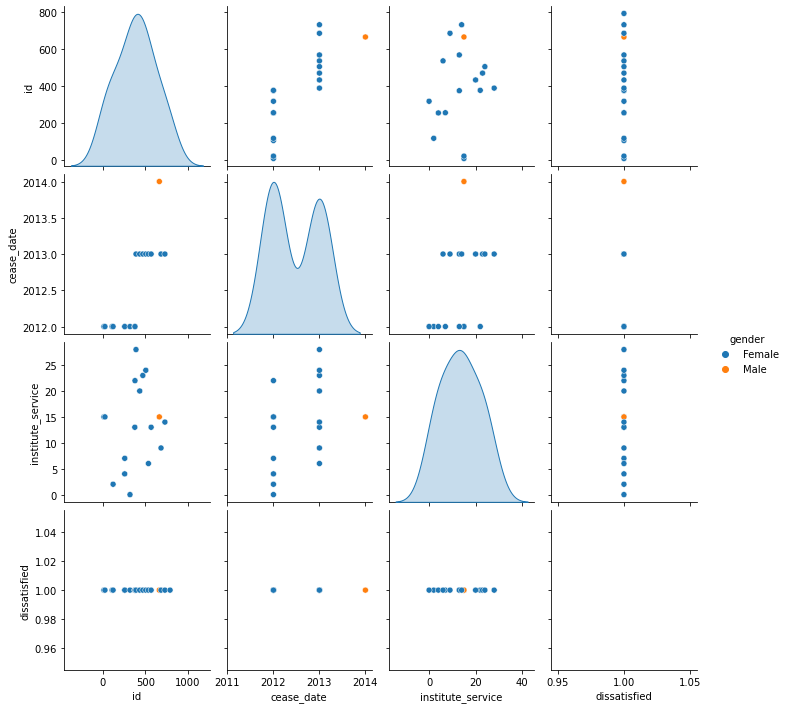

In [97]:
sns.pairplot(data=mid_fortyes_position, hue="gender")

### `'41-45'`

In [98]:
age_dissatidfied = employees_dissatisfied.groupby('age')
earlyes_fortyes_position =  age_dissatidfied.get_group('41-45') 

In [99]:
earlyes_fortyes_position['separationtype'].value_counts()

Resignation-Other reasons               14
Resignation-Other employer               6
Resignation-Move overseas/interstate     3
Name: separationtype, dtype: int64

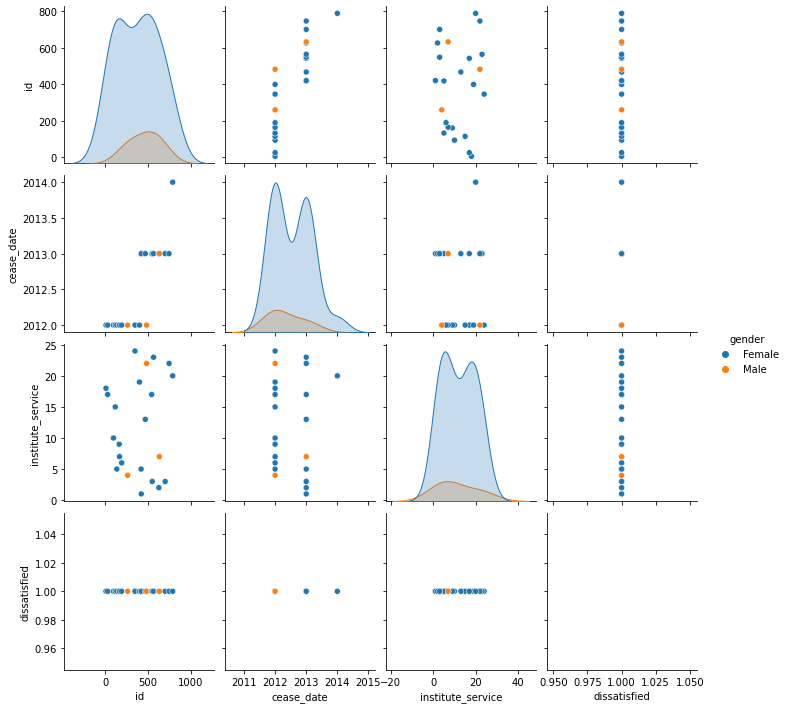

In [100]:
sns.pairplot(data=earlyes_fortyes_position, hue="gender")

### `'36-40'`

In [101]:
age_dissatidfied = employees_dissatisfied.groupby('age')
mid_tirtyes_position =  age_dissatidfied.get_group('36-40') 

In [102]:
mid_tirtyes_position['separationtype'].value_counts()

Resignation-Other reasons               10
Resignation-Other employer               4
Resignation-Move overseas/interstate     2
Name: separationtype, dtype: int64

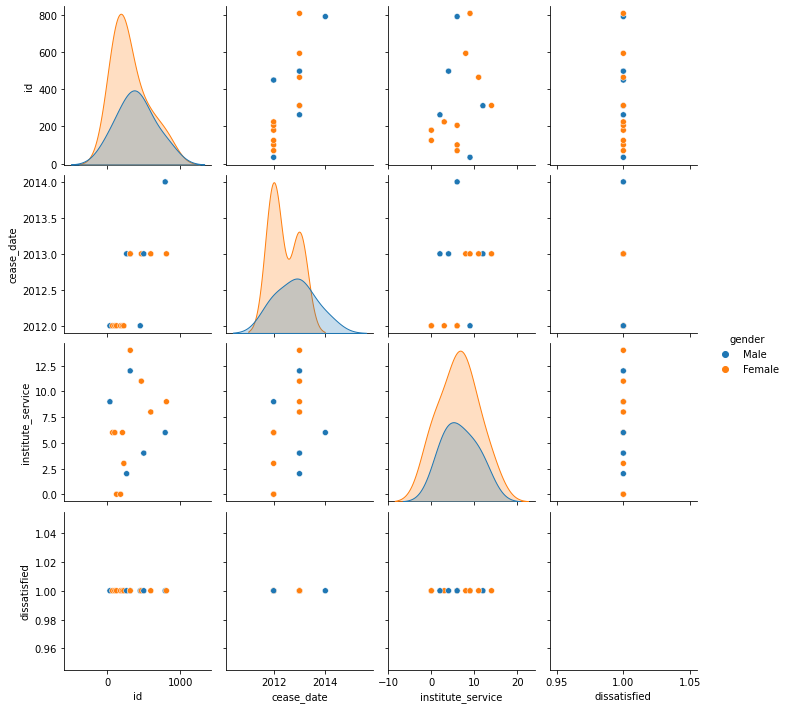

In [103]:
sns.pairplot(data=mid_tirtyes_position, hue="gender")

### `'31-35'`

In [104]:
age_dissatidfied = employees_dissatisfied.groupby('age')
early_tirtyes_position =  age_dissatidfied.get_group('31-35') 

In [105]:
early_tirtyes_position['separationtype'].value_counts()

Resignation-Other employer              7
Resignation-Other reasons               7
Resignation-Move overseas/interstate    2
Name: separationtype, dtype: int64

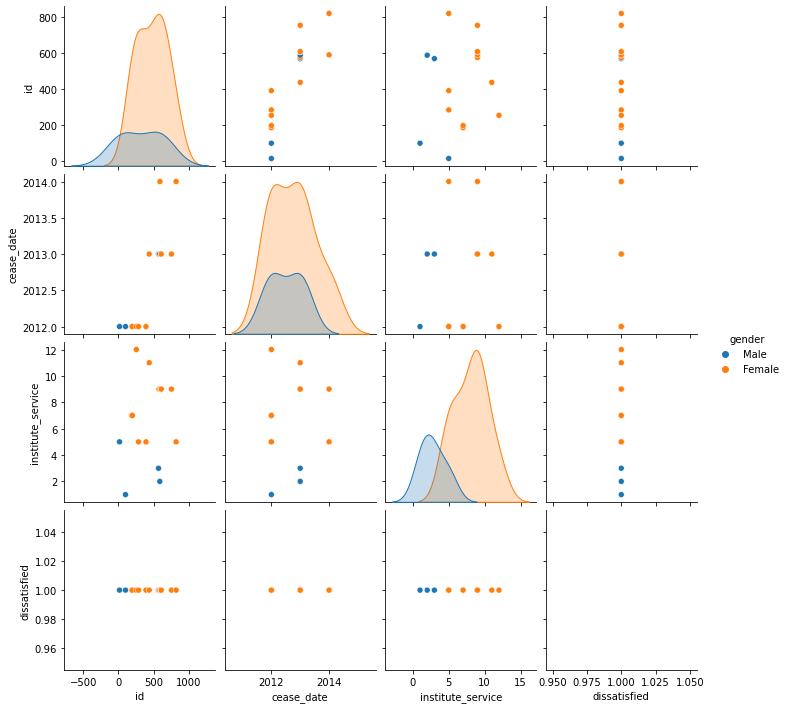

In [106]:
sns.pairplot(data=early_tirtyes_position, hue="gender")

### `'26-30'`

In [107]:
age_dissatidfied = employees_dissatisfied.groupby('age')
mid_tweties_position =  age_dissatidfied.get_group('26-30') 

In [108]:
mid_tweties_position['separationtype'].value_counts()

Resignation-Other reasons               9
Resignation-Other employer              8
Resignation-Move overseas/interstate    3
Name: separationtype, dtype: int64

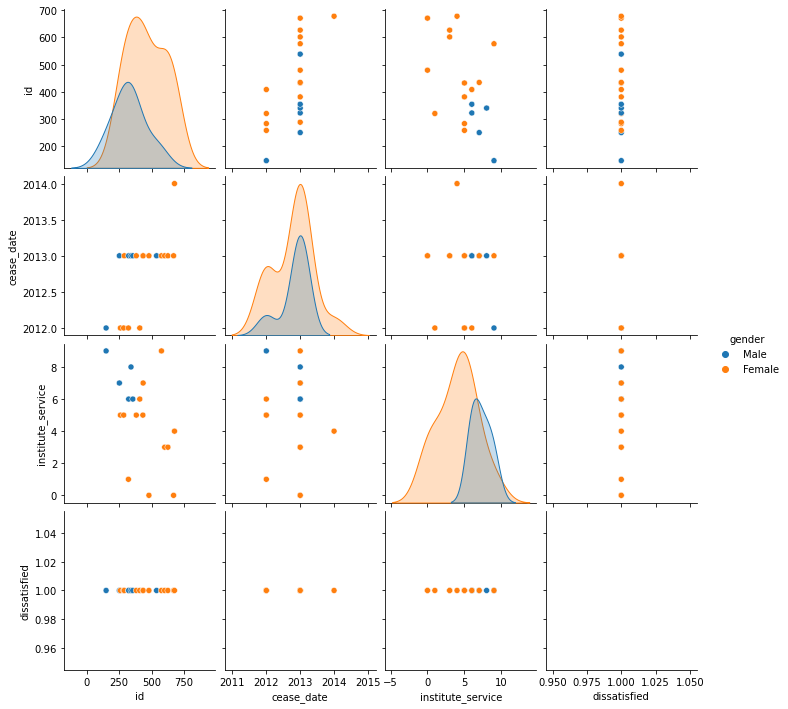

In [109]:
sns.pairplot(data=mid_tweties_position, hue="gender")

### `'21-25'`

In [110]:
age_dissatidfied = employees_dissatisfied.groupby('age')
early_tweties_position =  age_dissatidfied.get_group('21-25') 

In [111]:
early_tweties_position['separationtype'].value_counts()

Resignation-Move overseas/interstate    4
Resignation-Other reasons               4
Resignation-Other employer              1
Name: separationtype, dtype: int64

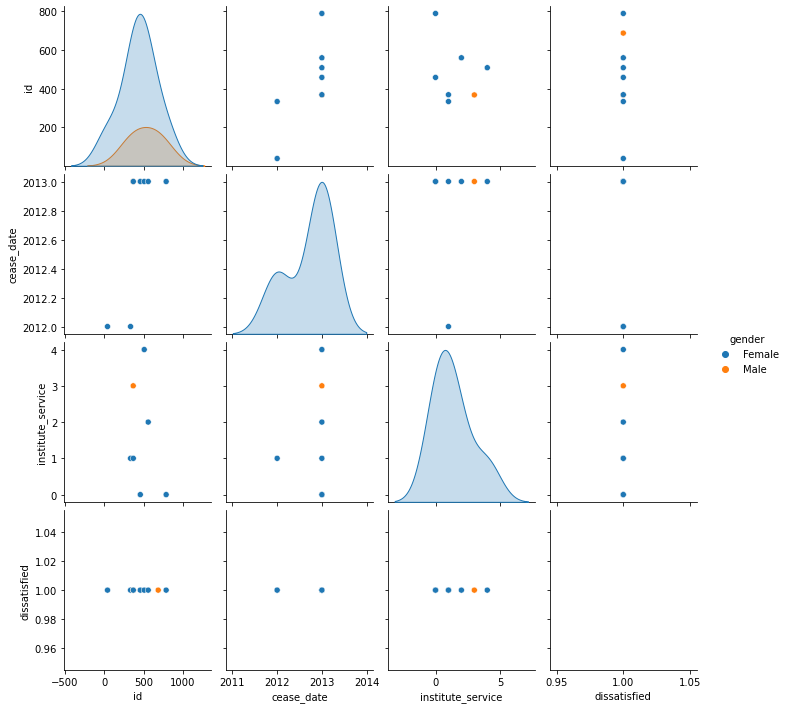

In [112]:
sns.pairplot(data=early_tweties_position, hue="gender")

### `'20 or younger'`

In [113]:
age_dissatidfied = employees_dissatisfied.groupby('age')
early_tweties_position =  age_dissatidfied.get_group('20 or younger') 

In [114]:
early_tweties_position['separationtype'].value_counts()

Resignation    2
Name: separationtype, dtype: int64

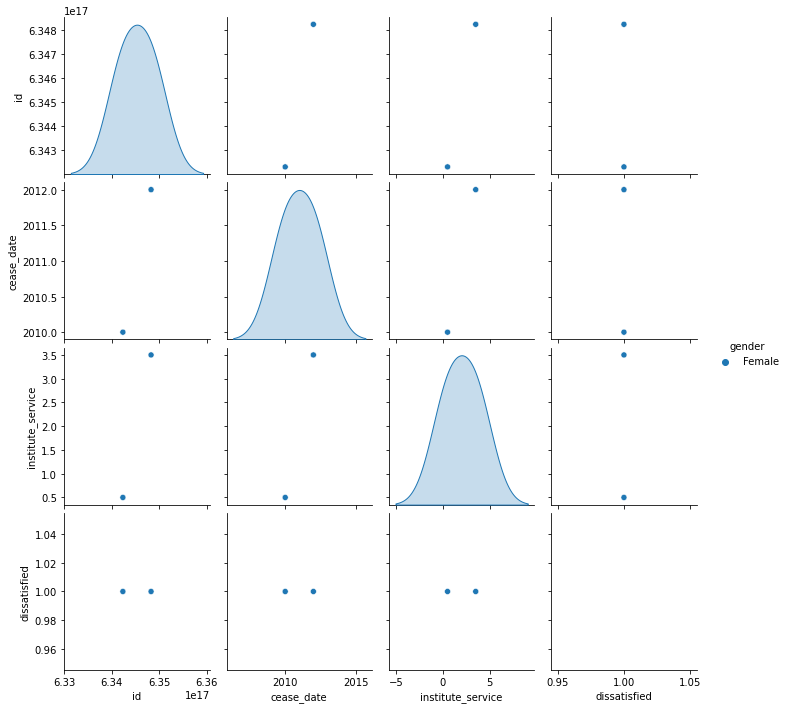

In [115]:
sns.pairplot(data=early_tweties_position, hue="gender")

### 

Instead of analyzing the survey results together, analyze each survey separately. 

## Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

- Looking at the **size of the df we know the number of people from both institutes**.

### Result in DETE

In [116]:
institute_dissatisfaied = employees_dissatisfied.groupby('institute')
dete_dissatisfaied = institute_dissatisfaied.get_group('DETE')
dete_dissatisfaied.shape

(149, 11)

In [117]:
dete_dissatisfaied['separationtype'].value_counts()

Resignation-Other reasons               89
Resignation-Other employer              41
Resignation-Move overseas/interstate    19
Name: separationtype, dtype: int64

### Result in TAFE

In [118]:
institute_dissatisfaied = employees_dissatisfied.groupby('institute')
tafe_dissatisfaied = institute_dissatisfaied.get_group('TAFE')
tafe_dissatisfaied.shape

(91, 11)

In [119]:
tafe_dissatisfaied['separationtype'].value_counts()

Resignation    91
Name: separationtype, dtype: int64

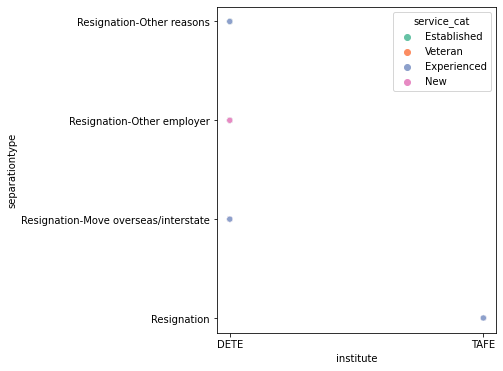

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns


f, ax = plt.subplots(figsize=(5, 6))
sns.scatterplot(data = combined_updated,
                y = 'separationtype',
                x = 'institute',
                palette='Set2',
                hue = 'service_cat')
plt.show()